<center> **Object Detection and Segmentation for Fine-Grained Recognition** </center>

***Abstract-*** *This project addresses the problem of fine-grained recognition: recognizing subordinate categories for types and the model of shoes.
It is trying to implement a fully unsupervised manner for the learning process of the part detectors. Based on the insight that images with similar poses can be automatically discovered for fine-grained classes in the same domain. The appearance descriptors are learned using a deep learning or convolutional neural network. Our approach requires only image level class labels, without any use of part annotations or segmentation masks, which may be costly to obtain. We try to show experimentally that combining these two insights is an effective strategy for fine-grained recognition. TensorFlow is using as the tools for the  efficient implementation.*

[TOC]: #Table-of-Contents-Support

# Outline
-  1.Introduction
-  2.Background
 -  2.1.Neural Network
 -  2.2.convolutional neural networks
  -  2.2.1.Local receptive fields
  -  2.2.2.Shared weights and biases
  -  2.2.3.Pooling Layers
-  3.Data Set and the Goal
 -  3.1.Description:
-  4.Architecture and Method
 -  1.Python Code
-  5.Next Steps


# 1. Introduction
Deep neural networks are often much harder to train; That's unfortunate, since we have good reason to believe that if we could train deep nets they'd be much more powerful. In this project, we'll develop techniques which can be used to train deep networks, and apply them in practice. We'll also look at the broader picture, briefly reviewing recent progress on using deep nets for image recognition. And we'll take a brief, speculative look at what the future may hold for neural nets, and for artificial intelligence.
We choose one of the common data sets by Yahoo-Webscope Project, ShoeImage. We'll start our account of convolutional networks with the shallow networks used to attack this problem earlier in the book. Through many iterations we'll build up more and more powerful networks. As we go we'll explore many powerful techniques: convolutions, pooling, the use of GPUs to do far more training than we did with our shallow networks, the algorithmic expansion of our training data (to reduce overfitting), the use of the dropout technique (also to reduce overfitting), the use of ensembles of networks, and others. The result will be a system that offers near-human performance.

The report is currently in beta. I welcome notification of typos, bugs, minor errors, and major misconceptions. Please drop me a line at Ali.Miraftab@utsa.edu if you spot such an error.

# 2. Background
## 2.1. Neural Network
We already know Neural Network is using networks in which adjacent network layers are fully connected to one another. That is, every neuron in the network is connected to every neuron in adjacent layers:

![eximage](http://neuralnetworksanddeeplearning.com/images/tikz41.png)

In particular, for each pixel in the input image, we encoded the pixel's intensity as the value for a corresponding neuron in the input layer. As an instance, for the 640×480 pixel images we've been using, this means our network has 307200 input neurons. We then trained the network's weights and biases so that the network's output would - we hope! - correctly identify the input image.

But upon reflection, it's strange to use networks with fully-connected layers to classify images. The reason is that such a network architecture does not take into account the spatial structure of the images. For instance, it treats input pixels which are far apart and close together on exactly the same footing. Such concepts of spatial structure must instead be inferred from the training data. But what if, instead of starting with a network architecture which is tabula rasa, we used an architecture which tries to take advantage of the spatial structure?

## 2.2. convolutional neural networks
In this section I describe **convolutional neural networks** The origins of convolutional neural networks go back to the 1970s. But the seminal paper establishing the modern subject of convolutional networks was a 1998 paper, "Gradient-based learning applied to document recognition", by <u>Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner</u>. LeCun has since made an interesting remark on the terminology for convolutional nets: "The [biological] neural inspiration in models like convolutional nets is very tenuous. That's why I call them 'convolutional nets' not 'convolutional neural nets', and why we call the nodes 'units' and not 'neurons' ". Despite this remark, convolutional nets use many of the same ideas as the neural networks we've studied up to now: ideas such as backpropagation, gradient descent, regularization, non-linear activation functions, and so on. And so we will follow common practice, and consider them a type of neural network. I will use the terms "convolutional neural network" and "convolutional net(work)" interchangeably. I will also use the terms "[artificial] neuron" and "unit" interchangeably.. These networks use a special architecture which is particularly well-adapted to classify images. Using this architecture makes convolutional networks fast to train. This, in turns, helps us train deep, many-layer networks, which are very good at classifying images. Today, deep convolutional networks or some close variant are used in most neural networks for image recognition.

Convolutional neural networks use three basic ideas:
- local receptive fields, 
- shared weights, 
- and pooling.  

Let's look at each of these ideas in turn.

### 2.2.1. Local receptive fields:
In the fully-connected layers shown earlier, the inputs were depicted as a vertical line of neurons.

<center>![eximage](http://neuralnetworksanddeeplearning.com/images/tikz42.png)</center>

In a convolutional, as per usual, we'll connect the input pixels to a layer of hidden neurons. But we won't connect every input pixel to every hidden neuron. Instead, we only make connections in small, localized regions of the input image.
To be more precise, each neuron in the first hidden layer will be connected to a small region of the input neurons, say, for example, a 5×5 region, corresponding to 25 input pixels. So, for a particular hidden neuron, we might have connections that look like this:

<center>![eximage](http://neuralnetworksanddeeplearning.com/images/tikz43.png)</center>

That region in the input image is called the local receptive field for the hidden neuron. It's a little window on the input pixels. Each connection learns a weight. And the hidden neuron learns an overall bias as well. You can think of that particular hidden neuron as learning to analyze its particular local receptive field.

We then slide the local receptive field across the entire input image. For each local receptive field, there is a different hidden neuron in the first hidden layer. To illustrate this concretely, let's start with a local receptive field in the top-left corner:

<center>![eximage](http://neuralnetworksanddeeplearning.com/images/tikz44.png)</center>

Then we slide the local receptive field over by one pixel to the right (i.e., by one neuron), to connect to a second hidden neuron:

<center>![eximage](http://neuralnetworksanddeeplearning.com/images/tikz45.png)</center>

And so on, building up the first hidden layer.

I've shown the local receptive field being moved by one pixel at a time. In fact, sometimes a different *stride length* is used. If we're interested in trying different stride lengths then we can use validation data to pick out the stride length which gives the best performance.

### 2.2.2. Shared weights and biases:
I've said that each hidden neuron has a bias and 5×5 weights connected to its local receptive field. What I did not yet mention is that we're going to use the same weights and bias for each of the **Local receptive fields** and correspondly hidden neurons. In other words, for the j,k the hidden neuron, the output is:


$$\begin{eqnarray} 
  \sigma\left(b + \sum_{l=0}^4 \sum_{m=0}^4  w_{l,m} a_{j+l, k+m} \right).
\tag{1}\end{eqnarray}$$

Here, σ is the neural activation function - perhaps the sigmoid function we used in earlier chapters. b is the shared value for the bias. $w_{l, m}$ is a $5×5$ array of shared weights. And, finally, we use $a_{x, y}$ to denote the input activation at position x,y.

This means that all the neurons in the first hidden layer detect exactly the same feature* *I haven't precisely defined the notion of a feature. Informally, think of the feature detected by a hidden neuron as the kind of input pattern that will cause the neuron to activate: it might be an edge in the image, for instance, or maybe some other type of shape. , just at different locations in the input image. To see why this makes sense, suppose the weights and bias are such that the hidden neuron can pick out, say, a vertical edge in a particular local receptive field. That ability is also likely to be useful at other places in the image. And so it is useful to apply the same feature detector everywhere in the image. To put it in slightly more abstract terms, convolutional networks are well adapted to the translation invariance of images: move a picture of a cat (say) a little ways, and it's still an image of a cat.

For this reason, we sometimes call the map from the input layer to the hidden layer a feature map. We call the weights defining the feature map the shared weights. And we call the bias defining the feature map in this way the shared bias. The shared weights and bias are often said to define a kernel or filter. In the literature, people sometimes use these terms in slightly different ways, and for that reason I'm not going to be more precise; rather, in a moment, we'll look at some concrete examples.

The network structure I've described so far can detect just a single kind of localized feature. To do image recognition we'll need more than one feature map. And so a complete convolutional layer consists of several different feature maps:

<center><img src="http://neuralnetworksanddeeplearning.com/images/tikz46.png"></center>

A big advantage of sharing weights and biases is that it greatly reduces the number of parameters involved in a convolutional network.

### 2.2.3. Pooling Layers:
In addition to the convolutional layers just described, convolutional neural networks also contain pooling layers. Pooling layers are usually used immediately after convolutional layers. What the pooling layers do is simplify the information in the output from the convolutional layer.

<center><img src="http://neuralnetworksanddeeplearning.com/images/tikz47.png"></center>

In detail, a pooling layer takes each feature map output from the convolutional layer and prepares a condensed feature map. For instance, each unit in the pooling layer may summarize a region of (say) 2×2 neurons in the previous layer.
- max-pooling
- L2 pooling

# 3. Data Set and the Goal

This dataset is provided as part of the Yahoo! Webscope program, to be
used for approved non-commercial research purposes by recipients who 
have signed a Data Sharing Agreement with Yahoo!. This dataset is not
to be redistributed. No personally identifying information is available
in this dataset. More information about the Yahoo! Webscope program is
available at http://research.yahoo.com

## 3.1. Description:

This dataset contains 107 folders, each corresponding to a type and brand of
shoe. The folders are

classes/aerosoles_sandals  
classes/aetrex_sandals  
...  
classes/wolverine_hiking  
classes/yellow_box_sandals  

each based on data generated by Yahoo! Shopping on or before December
2012, with some modifications and additions by Yahoo! Research.

<center><img src="/files/Webscope/ShoesImage/Webscope_I2/ydata-yshoes-image-content-v2_0/classes/lowa_hiking/715160418_640.jpg" width=200px></center>
<center><img src="/files/Webscope/ShoesImage/Webscope_I2/ydata-yshoes-image-content-v2_0/classes/lowa_hiking/761326860_640.jpg" width=200px></center>

Each folder contains some number of images of shoes of the respective type and brand. For example, the lacoste_sneakers folder contains the images:

1012557628_640.jpg  
1012557630_640.jpg  
1018321414_640.jpg  
1030031963_640.jpg  
...  

In total, 5250 images are included.

Also included is a .mat file (shoe_annos.mat), which contains a bounding box for each shoe image. For example, the image at:  

classes/lowa_hiking/757550203_640.jpg  

has the bounding box  

(x1, y1, x2, y2) = (143, 55, 501, 417)

# 4. Architecture and Method

## 4.1. Pytheon Code

In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import tarfile
import urllib
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
import cPickle as pickle
import scipy.io as sio

In [ ]:
shoe = sio.loadmat('shoe_annos.mat')

In [ ]:
shoe

In [ ]:
shoe['annotations']

In [ ]:
shoe_annos = shoe['annotations']

In [ ]:
shoe_annos

In [ ]:
shoe_annos.shape

In [ ]:
sio.whosmat('shoe_annos.mat')

In [ ]:
shoe_annos[0,0]

In [ ]:
shoe_annos[0,0:30]

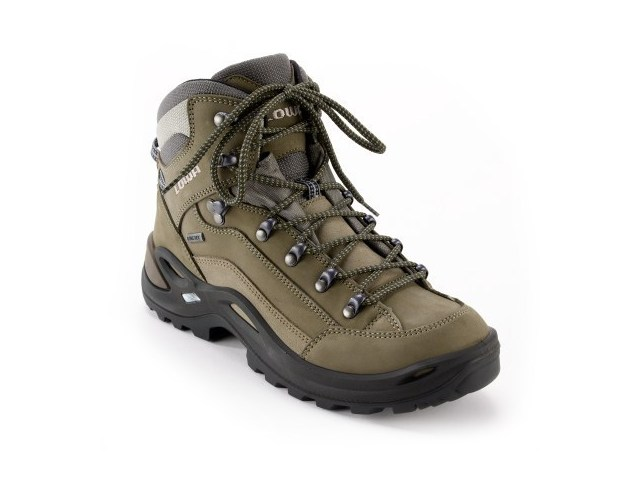

In [2]:
from IPython.display import Image, display
display(Image(filename='classes/lowa_hiking/757550203_640.jpg'))

In [ ]:
from pygame import surfarray, image, display
import pygame
import numpy #important to import


image_file = '/files/Webscope/ShoesImage/Webscope_I2/ydata-yshoes-image-content-v2_0/classes/lowa_hiking/757550203_640.jpg'
pygame.init()
image = image.load("classes/lowa_hiking/761326860_640.jpg") #surface to render
resolution = (image.get_width(),image.get_height())
print resolution
screen = display.set_mode(resolution) #create space for display


In [ ]:
import cv2
import numpy as np
image_file = '/files/Webscope/ShoesImage/Webscope_I2/ydata-yshoes-image-content-v2_0/classes/lowa_hiking/757550203_640.jpg'
img = cv2.imread(image_file)

In [ ]:
from PIL import Image
image_file = 'classes/lowa_hiking/757550203_640.jpg'
im = Image.open(image_file)
#rgb_im = im.convert('RGB')
#r, g, b = rgb_im.getpixel((1, 1))
r, g, b = im.getpixel((1, 1))
print r, g, b


In [ ]:
from PIL import Image
im = Image.open("classes/lowa_hiking/757550203_640.jpg") #Can be many different formats.
pix = im.load()
print im.size #Get the width and hight of the image for iterating over
### print pix[x,y] #Get the RGBA Value of the a pixel of an image

In [4]:
import PIL
import Image
FILENAME='classes/lowa_hiking/757550203_640.jpg' #image can be in gif jpeg or png format 
im=Image.open(FILENAME).convert('RGB')
pix=im.load()
w=im.size[0]
h=im.size[1]
print (w, h)

640 480


In [6]:
i_start = 0
j_start = 0

while i_start == 0:
    for i in range(w):
        for j in range(h):
            if pix[i,j] != (255, 255, 255):
                i_start = i
                j_start = j

In [8]:
print (i_start, j_start)

539 449


In [16]:
pix[200,100]

(161, 153, 130)

In [9]:
import matplotlib.cm as cm
imgplot = plt.imshow(pix[i_start:i_start+100, j_start:j_start+30], cmap = cm.Greys_r)

TypeError: an integer is required